# This notebook performs the preporcessing steps of DICOM to NIFTI conversion.

### Sina Dabiri

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

## 1. Convert image file formats from DICOM to NIFTI 

In [2]:
!pip install pydicom nibabel dicom2nifti

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 66.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 3.3/3.3 MB 64.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.9 MB ? eta -:--:--
   ------------------ --------------------- 13.1/28.9 MB 68.3 MB/s eta 0:00:01
   ------------------------------------- -- 27.3/28.9 MB 66.5 MB/s eta 0:00:01
   ---------------------------------------- 28.9/28.9 MB 61.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ------------------ --------------------- 21.2/44.8 MB 102.8 MB/s eta 0:00:01
   ---------------------------------------  44.6/44.8 MB 113.3 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 MB 89.0 MB/s eta 0:00:00


In [3]:
import pydicom
import nibabel as nib
import dicom2nifti

In [4]:
pwd

'C:\\Users\\sdabiri\\OneDrive - Georgia Institute of Technology\\BMED 8803 - Stat ML for Neural data\\Project\\BMED8803_DL_project'

dicom_directory = "C:/Users/sinad/OneDrive - Georgia Institute of Technology/BMED 8803 - Stat ML for Neural data/Project/Small_Dataset/s05/ImagingData_s05/run001_8/"
output_file = "C:/Users/sinad/OneDrive - Georgia Institute of Technology/BMED 8803 - Stat ML for Neural data/Project/preprocessed/s05/run001_8/"

dicom2nifti.convert_directory(dicom_directory, os.path.dirname(output_file))

# The NIfTI file will be saved in the specified output directory

In [8]:
import shutil

# Define the base directory containing subfolders with DICOM files
base_dicom_directory = os.path.abspath("C:/Users/sdabiri/OneDrive - Georgia Institute of Technology/BMED 8803 - Stat ML for Neural data/Project/Small_Dataset/s14/ImagingData_s14")
# Define the base directory where you want to save the NIFTI files
output_base_directory = os.path.abspath("C:/Users/sdabiri/OneDrive - Georgia Institute of Technology/BMED 8803 - Stat ML for Neural data/Project/preprocessed/s14/")

# Iterate through each subfolder in the base DICOM directory
for subfolder in os.listdir(base_dicom_directory):
    dicom_directory = os.path.join(base_dicom_directory, subfolder)

    # Make sure the path is a directory before proceeding
    if os.path.isdir(dicom_directory):
        output_directory = os.path.join(output_base_directory, subfolder)

        # Create the output directory if it doesn't exist
        os.makedirs(output_directory, exist_ok=True)

        try:
            # Convert the DICOM files in the subfolder to NIFTI format
            dicom2nifti.convert_directory(dicom_directory, output_directory, compression=False)
            print(f"Conversion successful for {dicom_directory}")
        except Exception as e:
            print(f"Failed to convert {dicom_directory}. Error: {str(e)}")


Conversion successful for C:\Users\sdabiri\OneDrive - Georgia Institute of Technology\BMED 8803 - Stat ML for Neural data\Project\Small_Dataset\s14\ImagingData_s14\run001_8
Conversion successful for C:\Users\sdabiri\OneDrive - Georgia Institute of Technology\BMED 8803 - Stat ML for Neural data\Project\Small_Dataset\s14\ImagingData_s14\run002_10
Conversion successful for C:\Users\sdabiri\OneDrive - Georgia Institute of Technology\BMED 8803 - Stat ML for Neural data\Project\Small_Dataset\s14\ImagingData_s14\run003_12
Conversion successful for C:\Users\sdabiri\OneDrive - Georgia Institute of Technology\BMED 8803 - Stat ML for Neural data\Project\Small_Dataset\s14\ImagingData_s14\run004_14
Conversion successful for C:\Users\sdabiri\OneDrive - Georgia Institute of Technology\BMED 8803 - Stat ML for Neural data\Project\Small_Dataset\s14\ImagingData_s14\run005_16
Conversion successful for C:\Users\sdabiri\OneDrive - Georgia Institute of Technology\BMED 8803 - Stat ML for Neural data\Project\S

In [11]:
import os

output_directory = "C:/Users/sdabiri/OneDrive - Georgia Institute of Technology/BMED 8803 - Stat ML for Neural data/Project/preprocessed/s14/run001_8/"
files_in_output = os.listdir(output_directory)
print(files_in_output)


['8_run001.nii']


In [12]:
output_file = "C:/Users/sdabiri/OneDrive - Georgia Institute of Technology/BMED 8803 - Stat ML for Neural data/Project/preprocessed/s05/run001_8/"
nifti_file = output_file + files_in_output[0]  # Replace with correct file name
nifti_image = nib.load(nifti_file)
print(nifti_image.shape)
print(nifti_image.header)


(96, 96, 20, 328)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4  96  96  20 328   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : -0.001846875
quatern_c       : 0.9799252
quatern_d       : -0.19914974
qoffset_x       : 99.34811
qoffset_y       : -87.06217
qoffset_z       : 

In [13]:
print(nifti_image.files_types)

(('image', '.nii'),)


## 2. Gaussian Filter

Image shape: (96, 96, 20, 328)


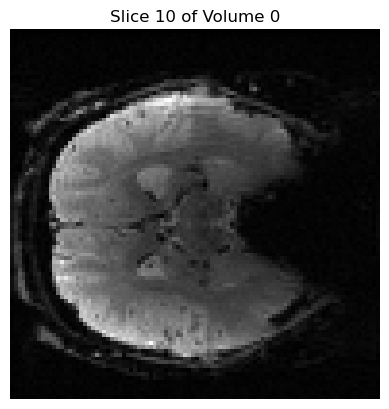

In [14]:
# Display the image for one of the runs:
# Get the image data as a numpy array
image_data = nifti_image.get_fdata()

# Print the shape of the image to understand its dimensions
print(f"Image shape: {image_data.shape}")

# Select a single 3D volume (e.g., first volume, index 0)
volume_index = 0
volume_data = image_data[:, :, :, volume_index]

# Display a middle slice of the 3D volume (along the third axis)
slice_index = volume_data.shape[2] // 2  # Take the middle slice along the third dimension

plt.imshow(volume_data[:, :, slice_index], cmap="gray")
plt.title(f"Slice {slice_index} of Volume {volume_index}")
plt.axis('off')  # Turn off the axis labels
plt.show()

In [15]:
!pip install nilearn

   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 10.4/10.4 MB 81.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 11.0/11.0 MB 97.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 75.6 MB/s eta 0:00:00


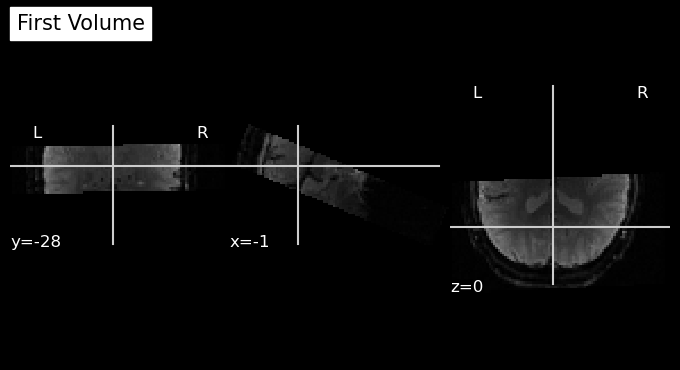

In [16]:
from nilearn import plotting

# Get the data and extract a specific 3D volume (e.g., the first volume)
image_data = nifti_image.slicer[:, :, :, 0]  # Extracting the first volume

# Plot the first volume
plotting.plot_anat(image_data, title="First Volume")
plotting.show()


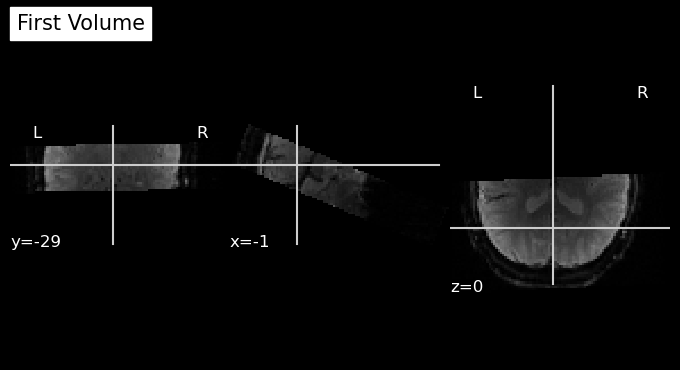

In [17]:
import nibabel as nib

# Load the 4D NIFTI image
nifti_image = nib.load(nifti_file)

# Get the data and extract a specific 3D volume (e.g., the first volume)
image_data = nifti_image.slicer[:, :, :, 100]  # Extracting the first volume

# Plot the first volume
plotting.plot_anat(image_data, title="First Volume")
plotting.show()



In [18]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Load the 4D NIFTI file (replace with your own file path)
nifti_path = nifti_file
nifti_image = nib.load(nifti_path)
image_data = nifti_image.get_fdata()

# Extract the dimensions of the 4D image (e.g., 96x96x20x328)
x, y, z, t = image_data.shape

# Function to display a specific timepoint
def plot_volume_at_timepoint(timepoint):
    plt.figure(figsize=(8, 6))
    plt.title(f"fMRI Slice at timepoint {timepoint}")
    
    # Select the middle slice along the z-axis (axial slice)
    slice_index = z // 2
    plt.imshow(image_data[:, :, slice_index, timepoint], cmap="gray")
    plt.axis("off")
    plt.show()

# Create a slider for selecting time points
time_slider = widgets.IntSlider(min=0, max=t-1, step=1, value=0, description='Timepoint')

# Update the plot when the slider is moved
widgets.interact(plot_volume_at_timepoint, timepoint=time_slider)


ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
# Mask visualization
mask_path = "C:/Users/sinad/OneDrive - Georgia Institute of Technology/BMED 8803 - Stat ML for Neural data/Project/Small_Dataset/s05/REC.nii"
mask_image = nib.load(mask_path)

In [ ]:
mask_data = mask_image.get_fdata()

# Print the shape of the image to understand its dimensions
print(f"Image shape: {mask_data.shape}")

z_index = mask_data.shape[2]
print("z plane:", z_index)

# Display a middle slice of the 3D volume (along the third axis)
slice_index = z_index // 2  # Take the middle slice along the third dimension

plt.imshow(mask_data[:, :,slice_index], cmap="gray")
plt.title(f"Slice {slice_index}")
plt.axis('off')  # Turn off the axis labels
plt.show()